In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('precos.tsv', sep='\t', parse_dates=['DATA INICIAL','DATA FINAL'])

In [26]:
df.head(2)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115


In [4]:
df.shape

(120823, 18)

In [5]:
df.loc[:,:'PREÇO MÁXIMO REVENDA']

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400
...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699


In [6]:
df_tratado =df.loc[:,:'PREÇO MÁXIMO REVENDA'].copy()

In [7]:
df_tratado.columns = ['dt_inicial', 'dt_final', 'regiao', 'estado', 'produto',
       'numero_postos_pesquisados', 'unidade_medida',
       'preco_media_revenda', 'desvio_padrao_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda']

In [8]:
len(df_tratado['estado'].unique())

27

In [9]:
df_tratado['estado'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [10]:
df_tratado['produto'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10',
       'GASOLINA ADITIVADA'], dtype=object)

In [11]:
df_tratado['dt_final'].min(), df_tratado['dt_final'].max()

(Timestamp('2004-05-15 00:00:00'), Timestamp('2021-05-01 00:00:00'))

In [12]:
df_sc_gasolina = df_tratado.query("estado == 'SANTA CATARINA' and produto == 'GASOLINA COMUM'").copy()

In [13]:
df_sc_gasolina.shape

(873, 11)

In [14]:
df_sc_gasolina.set_index('dt_final', inplace=True)

In [15]:
df_sc_gasolina.head(2)

,dt_inicial,regiao,estado,produto,numero_postos_pesquisados,unidade_medida,preco_media_revenda,desvio_padrao_revenda,preco_minimo_revenda,preco_maximo_revenda
dt_final,,,,,,,,,,
2004-05-15,2004-05-09,SUL,SANTA CATARINA,GASOLINA COMUM,513,R$/l,2.070,0.065,1.77,2.199
2004-05-22,2004-05-16,SUL,SANTA CATARINA,GASOLINA COMUM,517,R$/l,2.067,0.065,1.86,2.188


In [16]:
df_sc_gasolina = df_sc_gasolina.loc['2005': '2020'].copy()

In [17]:
df_sc_gasolina.shape

(822, 10)

<Axes: >

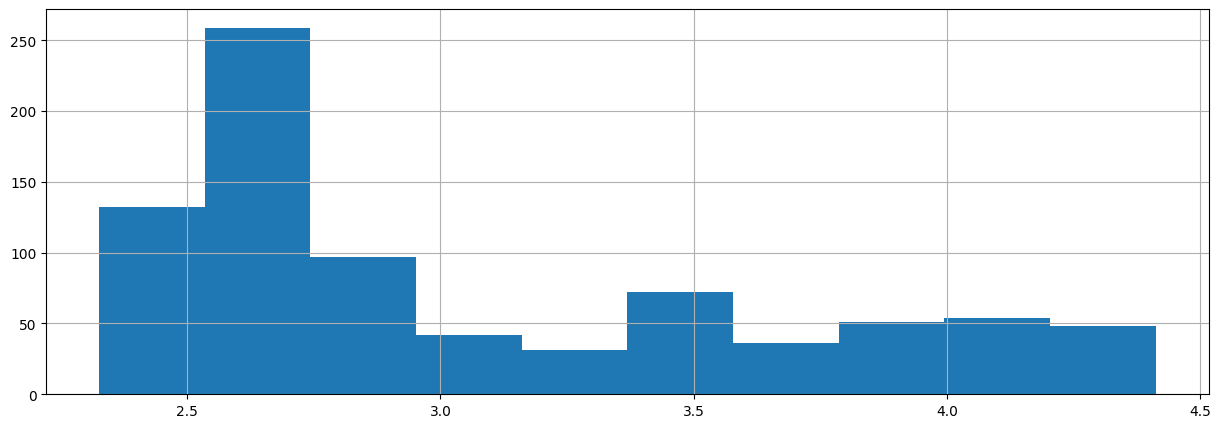

In [18]:
plt.figure(figsize=(15,5))
df_sc_gasolina['preco_media_revenda'].hist()

In [19]:
df_sc_gasolina['preco_media_revenda'].describe()

count    822.000000
mean       3.066528
std        0.609740
min        2.326000
25%        2.555000
50%        2.776000
75%        3.528000
max        4.412000
Name: preco_media_revenda, dtype: float64

In [20]:
df_tabela = df_sc_gasolina.groupby(df_sc_gasolina.index.year).agg({
'preco_media_revenda': np.mean
})

C:\Users\RAFAE\AppData\Local\Temp\ipykernel_7396\456576920.py:1: FutureWarning: The provided callable <function mean at 0x000002292B9D6660> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_tabela = df_sc_gasolina.groupby(df_sc_gasolina.index.year).agg({


In [21]:
df_tabela.shift(1)

,preco_media_revenda
dt_final,
2005,NaN
2006,2.426235
2007,2.573769
2008,2.542173
2009,2.536154
2010,2.533740
2011,2.576038
2012,2.724132
2013,2.720288


In [22]:
df_tabela['valor_ano_anterior'] = df_tabela.shift(1)

In [23]:
df_tabela = df_tabela.loc['2006':].copy()

In [24]:
df_tabela['variacao_percentual'] = round(((df_tabela['preco_media_revenda']/df_tabela['valor_ano_anterior']) -1)*100,2)

In [25]:
df_tabela

,preco_media_revenda,valor_ano_anterior,variacao_percentual
dt_final,,,
2006,2.573769,2.426235,6.08
2007,2.542173,2.573769,-1.23
2008,2.536154,2.542173,-0.24
2009,2.533740,2.536154,-0.10
2010,2.576038,2.533740,1.67
2011,2.724132,2.576038,5.75
2012,2.720288,2.724132,-0.14
2013,2.846462,2.720288,4.64
2014,2.956981,2.846462,3.88
